In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [86]:
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [87]:
df.shape

(918, 12)

In [88]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [89]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# NO null columns


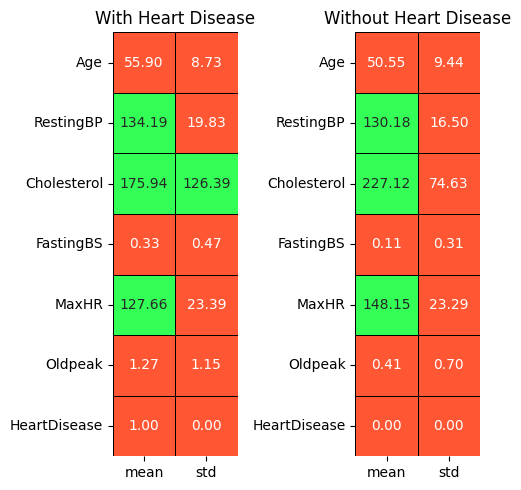

In [91]:
yes = df[df['HeartDisease']==1].describe().T
no = df[df['HeartDisease']==0].describe().T
color = ['#FF5733', '#33FF57']

fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(5,5))

plt.subplot(1,2,1)
plt.title('With Heart Disease')
sns.heatmap(yes[['mean','std']],annot = True,cmap = color,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)

plt.subplot(1,2,2)
sns.heatmap(no[['mean','std']], annot=True, cmap=color, cbar=False, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Without Heart Disease')

fig.tight_layout()

# EDA #


In [92]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 10:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


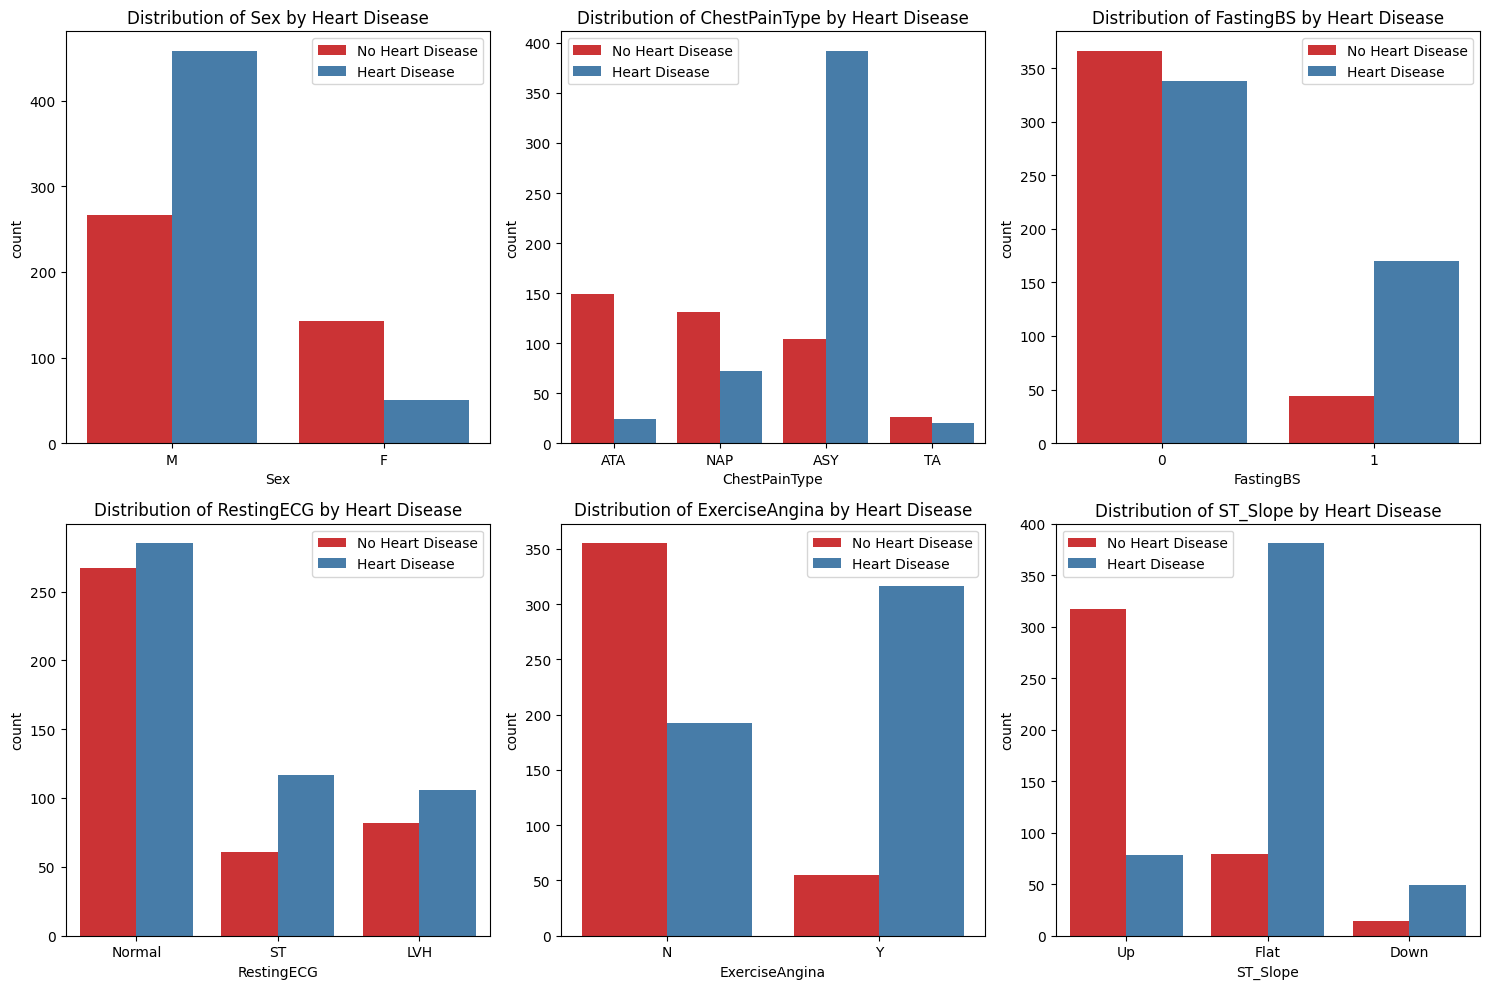

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(len(categorical_features)-1):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], hue=df['HeartDisease'], palette='Set1')
    plt.title(f'Distribution of {categorical_features[i]} by Heart Disease')
    plt.legend(['No Heart Disease', 'Heart Disease'])

fig.tight_layout()

- All the categorical features are near about **Normally Distributed**.

C:\Users\mdwas\AppData\Local\Temp\ipykernel_10040\2134116668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
C:\Users\mdwas\AppData\Local\Temp\ipykernel_10040\2134116668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_features[i]])
C:\Users\mdwas\A

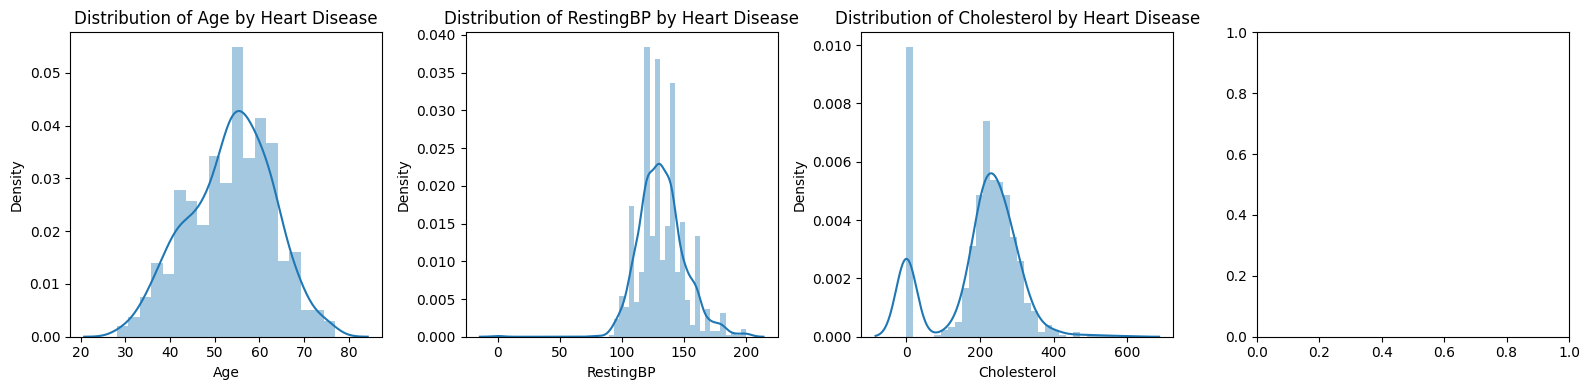

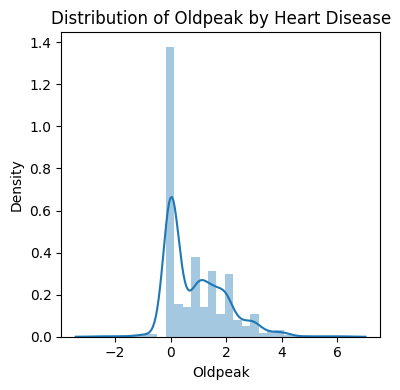

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
for i in range(len(numerical_features)-2):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[numerical_features[i]])
    plt.title(f'Distribution of {numerical_features[i]} by Heart Disease')

fig.tight_layout()
plt.figure(figsize=(4,4))
sns.distplot(df[numerical_features[-1]])
plt.title(f'Distribution of {numerical_features[-1]} by Heart Disease')
plt.tight_layout()

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution. 

C:\Users\mdwas\AppData\Local\Temp\ipykernel_10040\2414984066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


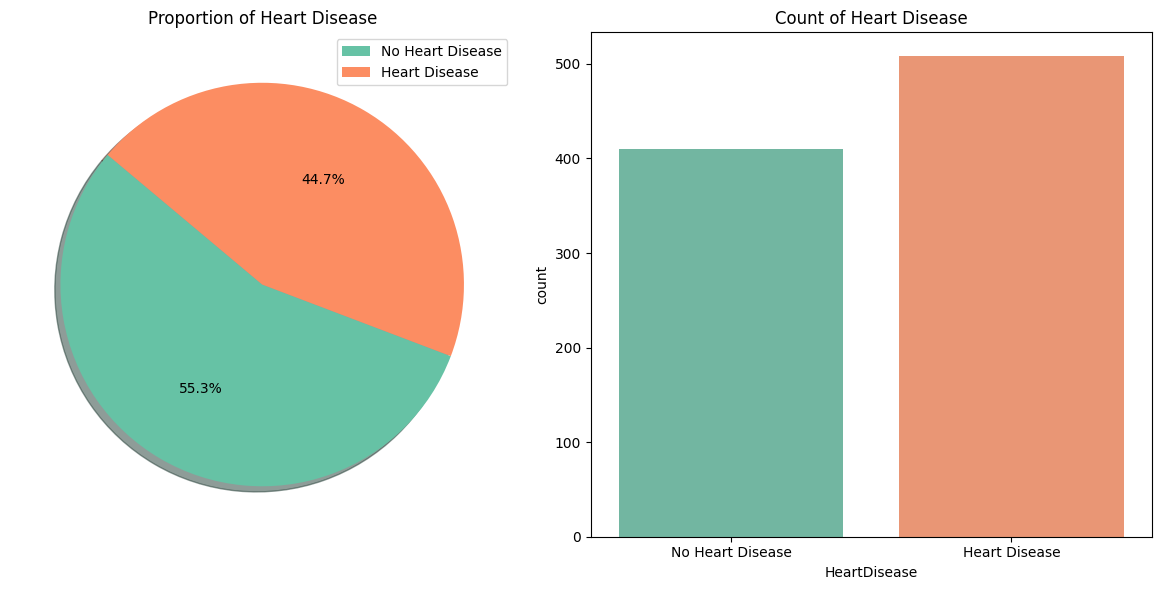

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df['HeartDisease'].value_counts(), autopct='%1.1f%%', colors=sns.color_palette('Set2'),shadow=True, startangle=140)
plt.title('Proportion of Heart Disease')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.subplot(1, 2, 2)
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Count of Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
fig.tight_layout()
plt.show()

- The dataset is pretty much **evenly balanced!**

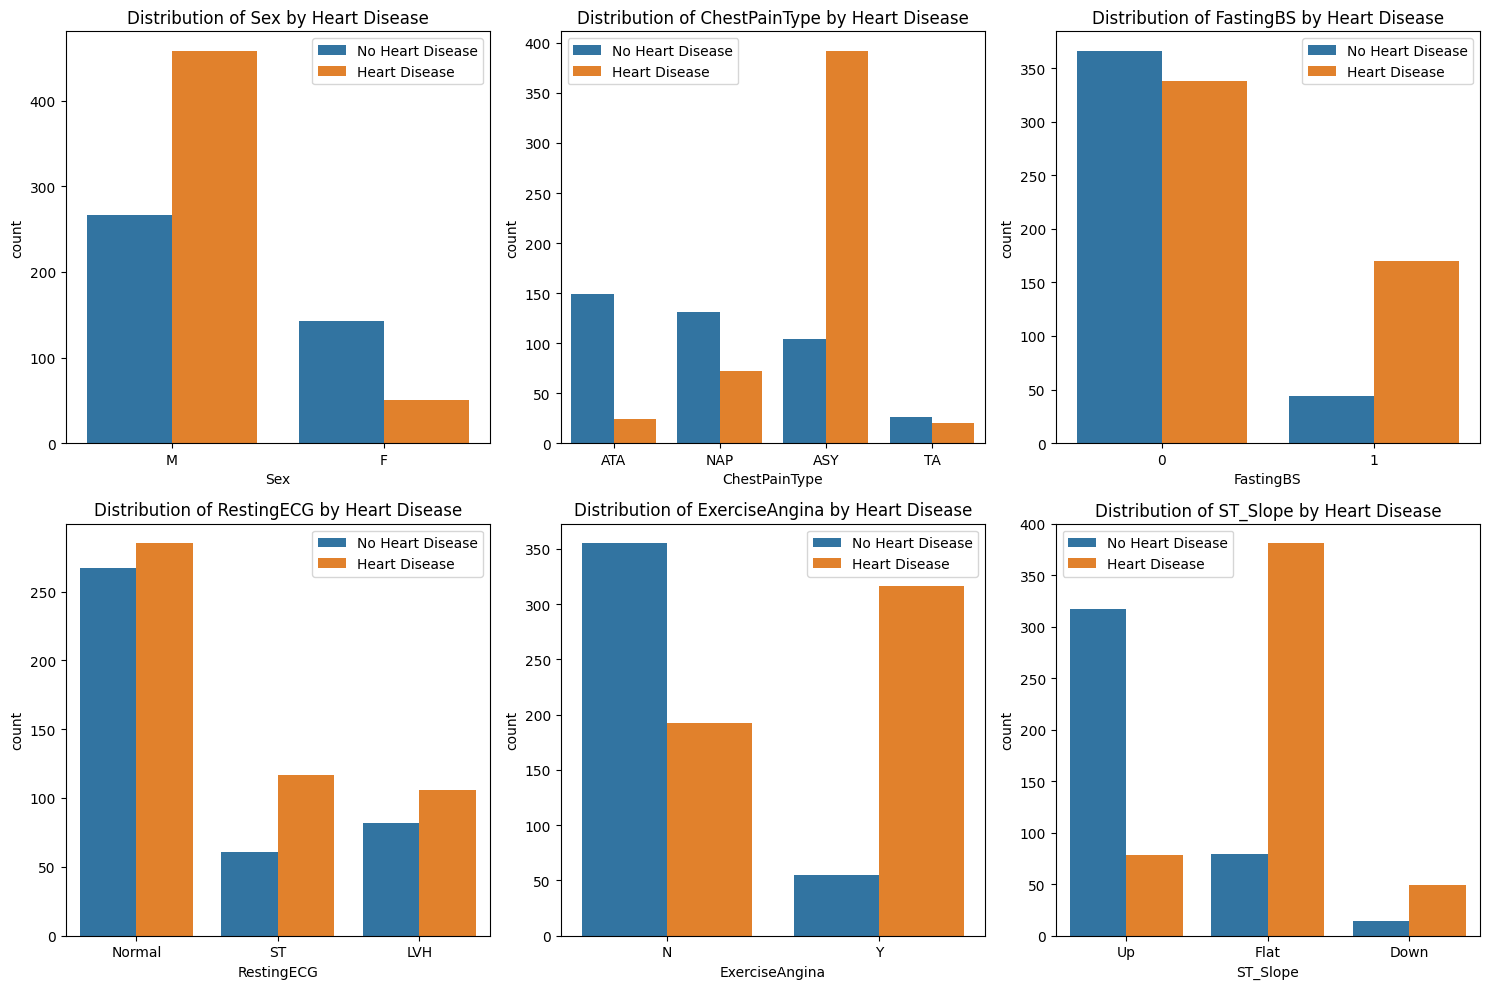

In [96]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i in range(len(categorical_features)-1):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]], hue=df['HeartDisease'])
    plt.title(f'Distribution of {categorical_features[i]} by Heart Disease')
    plt.legend(['No Heart Disease', 'Heart Disease'])
fig.tight_layout()

- **Male** population has more heart disease patients than no heart disease patients. In the case of **Female** population, heart disease patients are less than no heart disease patients. 
- **ASY** type of chest pain boldly points towards major chances of heart disease.
- **Fasting Blood Sugar** is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients. 
- **RestingECG** does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.
- **Exercise Induced Engina** definitely bumps the probability of being diagnosed with heart diseases.
- With the **ST_Slope** values, **flat** slope displays a very high probability of being diagnosed with heart disease. **Down** also shows the same output but in very few data points. 

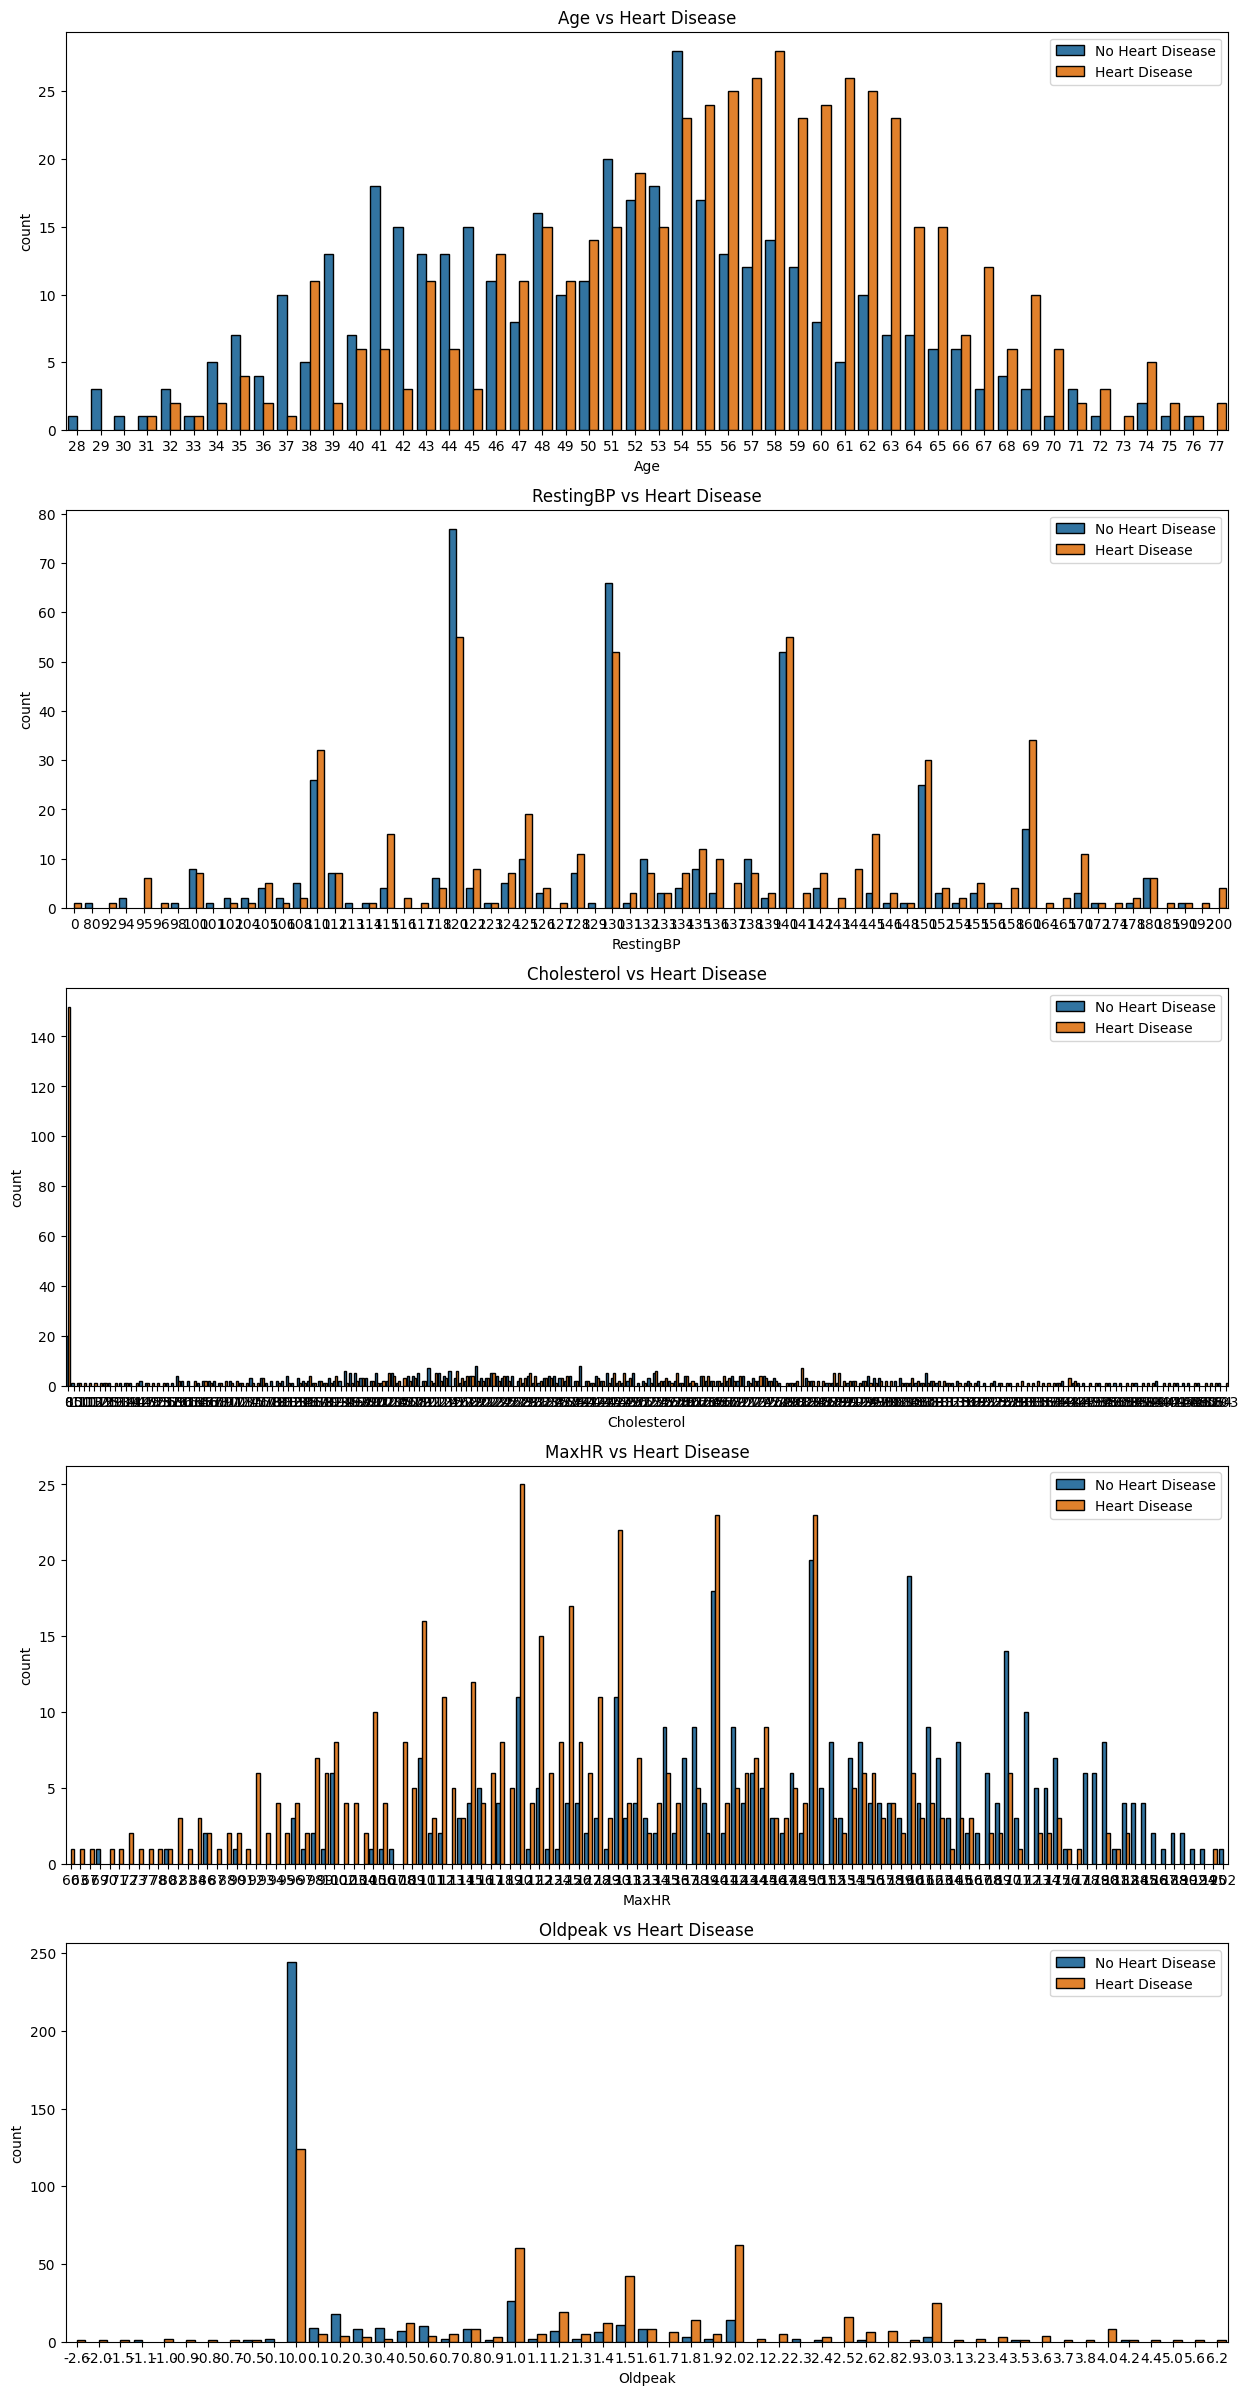

In [97]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(x=df[numerical_features[i]], hue=df['HeartDisease'], edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)



- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4

# Feature Engineering


In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('HeartDisease', axis=1), df['HeartDisease'], test_size=0.2, random_state=42)

In [99]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0


In [100]:
for i in range(len(x_train.columns)):
    print(i+1,"  ",x_train.columns[i])

1    Age
2    Sex
3    ChestPainType
4    RestingBP
5    Cholesterol
6    FastingBS
7    RestingECG
8    MaxHR
9    ExerciseAngina
10    Oldpeak
11    ST_Slope


In [101]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# label encoding for categorical features and scaling and normalization for numerical features
trf1 = ColumnTransformer([
    ('label_encoding', OrdinalEncoder(),[1,2,6,8,10]), # sex 1, chestpaintype 2, restecg 6, exerciseangina 8, st_slope 10
    ('scaling', StandardScaler(), [0,3,4,7]), # Age 0, RestingBP 3, Cholesterol 4, MaxHR 7
    ('normalization', MinMaxScaler(), [9])
], remainder='passthrough')



In [102]:
# Fit ColumnTransformer and transform training data, then build a DataFrame with original column names
input_features = list(x_train.columns)

# Fit and transform
x_trans = trf1.fit_transform(x_train)

names_out = list(trf1.get_feature_names_out(input_features))
# Strip any transformer prefixes like 'label_encoding__Sex' -> 'Sex'
base_names = [n.split('__')[-1] for n in names_out]

x_trans_df = pd.DataFrame(x_trans, columns=base_names, index=x_train.index)



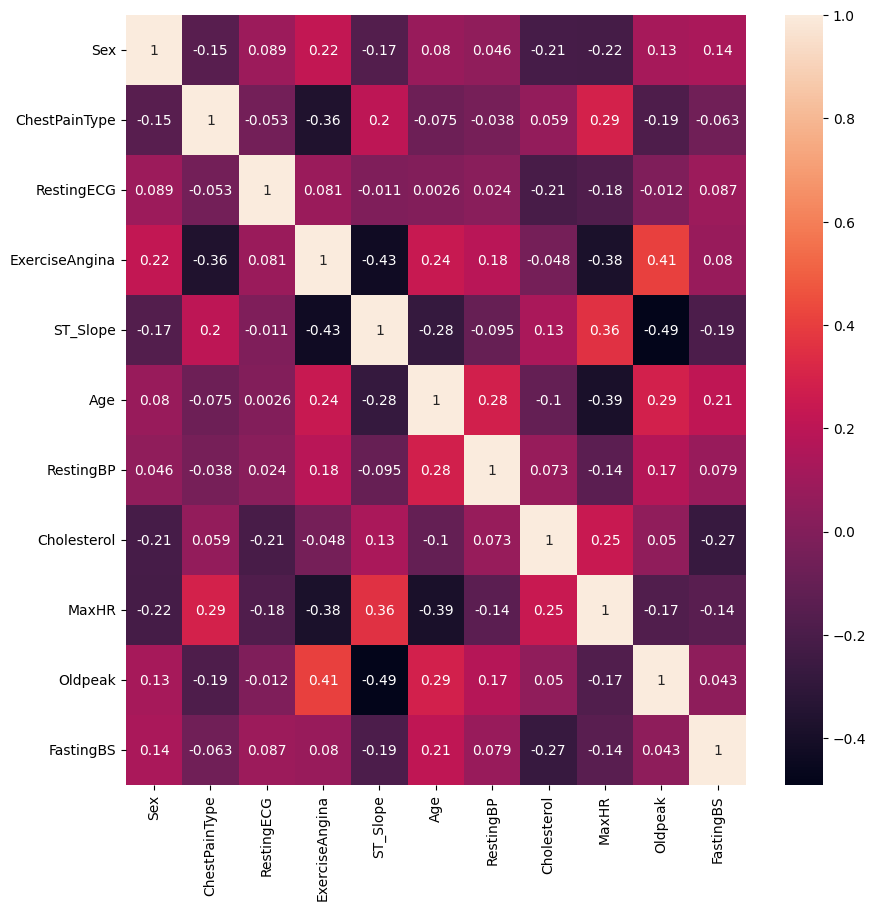

In [103]:
plt.figure(figsize=(10,10))
sns.heatmap(x_trans_df.corr(),annot=True)
plt.show()

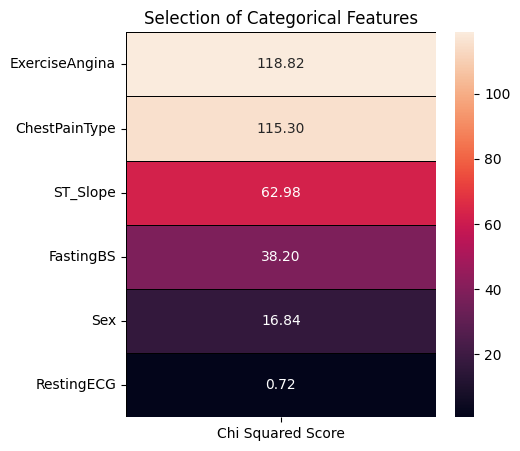

In [104]:
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(x_trans_df[['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']],y_train)

featureScores = pd.DataFrame(data = fit.scores_,index = list(['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

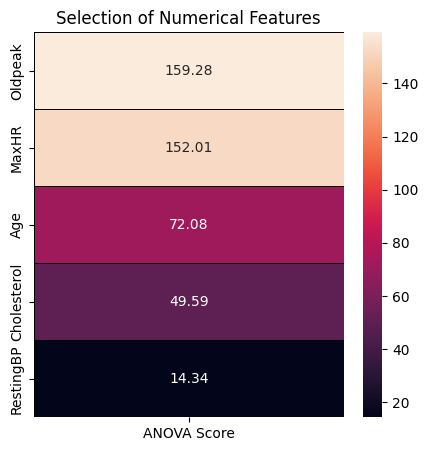

In [105]:
from sklearn.feature_selection import f_classif


best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(x_trans_df[numerical_features],y_train)

featureScores = pd.DataFrame(data = fit.scores_,index = list(x_trans_df[numerical_features].columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

# Modeling

In [106]:
from sklearn.model_selection import cross_val_score , GridSearchCV , RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix , roc_auc_score , classification_report , accuracy_score , precision_recall_curve

In [107]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))


def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# train test transform

In [108]:
x_train= trf1.fit_transform(x_train)
x_test= trf1.transform(x_test)

#### 1] Logistic Regression :

Accuracy :  84.24%
Cross Validation Score :  91.30%
ROC_AUC Score :  84.81%
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



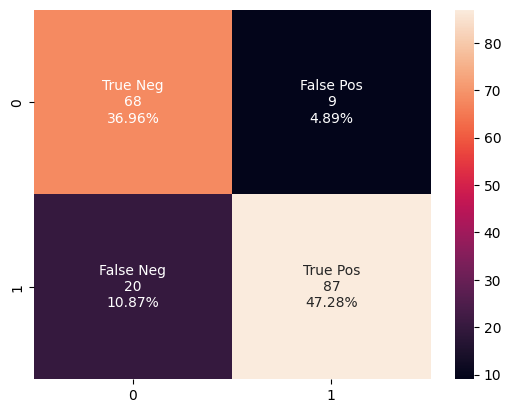

In [109]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)
model_evaluation(classifier_lr)

Accuracy :  86.96%
Cross Validation Score :  91.82%
ROC_AUC Score :  86.96%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



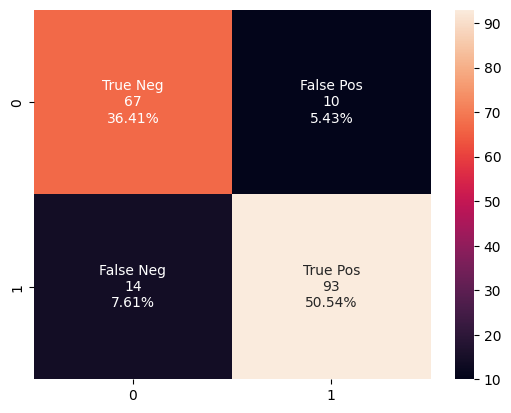

In [110]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf',C= 1,gamma= 'scale',random_state=0)
model(classifier_svc)
model_evaluation(classifier_svc)

Accuracy :  88.59%
Cross Validation Score :  92.37%
ROC_AUC Score :  88.37%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



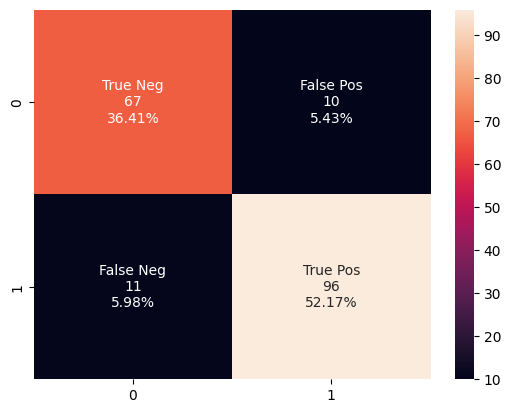

In [111]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model(classifier_rf)
model_evaluation(classifier_rf)


d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy :  86.96%


d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
d:\Desktop\Project\iot-based-health-monitoring-system\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:0

Cross Validation Score :  91.66%
ROC_AUC Score :  87.33%
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



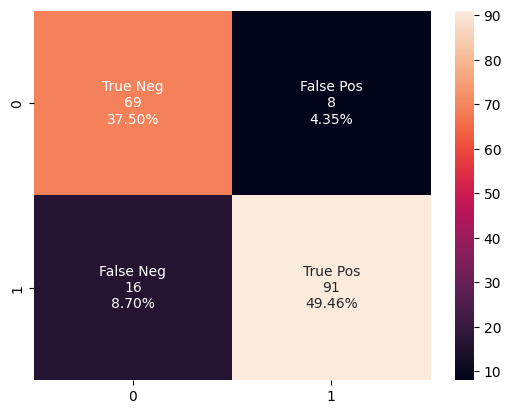

In [112]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
model(classifier_xgb)
model_evaluation(classifier_xgb)